In [17]:
import json
import numpy as np
import pandas as pd
from datetime import datetime , timedelta
from pytz import timezone
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
files = ['tweets_#gopatriots.txt']
rawdata = {'hours':list(),'title':list(),'tweets':list(),'retweet':list(),'followers':list(),'maxfollowers':list(),
           'timeofday':list(),'usermention':list(),'rankingscore':list(),'sta':list(),'hashtags':list(),
           'verified':list(),'sentiment':list()}
for filename in files:
    with open(filename) as file:
        for line in file:
            data_line = json.loads(line)
            cite_date = data_line['citation_date']
            pst_tz = timezone('US/Pacific')
            x = datetime.fromtimestamp(cite_date, pst_tz)
            rawdata['hours'].append(x)
            rawdata['title'].append(data_line['title'])
            rawdata['tweets'].append(1)
            rawdata['retweet'].append(data_line['metrics']['citations']['total'])  
            rawdata['followers'].append(data_line['author']['followers'])
            rawdata['maxfollowers'].append(data_line['author']['followers'])
            rawdata['timeofday'].append(x.hour)
            rawdata['usermention'].append(len(data_line['tweet']['entities']['user_mentions']))
            rawdata['hashtags'].append(len(data_line['tweet']['entities']['hashtags']))
            rawdata['rankingscore'].append(data_line['metrics']['ranking_score'])
            rawdata['sta'].append(data_line['tweet']['user']['statuses_count'])
            rawdata['verified'].append(data_line['tweet']['user']['verified'])
    print(len(rawdata['hours']))

sid = SentimentIntensityAnalyzer()
for title in rawdata['title']:
    ss = sid.polarity_scores(title)
    rawdata['sentiment'].append(ss['compound'])
print(len(rawdata['sentiment']))

rawdata = pd.DataFrame(rawdata, columns=['hours','title','tweets','retweet','followers','maxfollowers',
                        'timeofday','usermention','rankingscore','sta','hashtags','verified','sentiment'])
data_gp = rawdata.groupby(pd.Grouper(key='hours', freq='3600s'))

data = {'hours':list(),'tweets':list(),'retweet':list(),'followers':list(),'timeofday':list(),
        'usermention':list(),'rankingscore':list(),'hashtags':list(),'verified':list(),'sentiment':list()}
for i,(j,group) in enumerate(data_gp):
    data['hours'].append(i)
    data['tweets'].append(group.tweets.sum())
    data['retweet'].append(group.retweet.sum())
    data['followers'].append(group.followers.sum())
    data['timeofday'].append(group.timeofday.max())
    data['usermention'].append(group.usermention.sum())
    data['rankingscore'].append(group.rankingscore.mean())
    data['hashtags'].append(group.hashtags.sum())
    data['verified'].append(group.verified.sum())
    data['sentiment'].append(group.sentiment.mean())
data = pd.DataFrame(data, columns = ['hours','tweets','retweet','followers','timeofday','usermention',
                                     'rankingscore','hashtags','verified','sentiment'])
print(data)

26232
26232
     hours  tweets  retweet  followers  timeofday  usermention  rankingscore  \
0        0       1        4    10955.0        1.0            2      6.719686   
1        1       1        3     1762.0        2.0            0      5.019346   
2        2       0        0        0.0        NaN            0           NaN   
3        3       2        3     1168.0        4.0            3      4.690556   
4        4       2        3      465.0        5.0            1      4.151074   
5        5       2        3     2850.0        6.0            2      3.883750   
6        6       1        1     1101.0        7.0            1      3.985633   
7        7       1        1      712.0        8.0            0      7.685281   
8        8       1        6     2895.0        9.0            0      4.640276   
9        9       5        5     4732.0       10.0            5      4.638049   
10      10       3        3     1547.0       11.0            2      4.289623   
11      11       3        5 

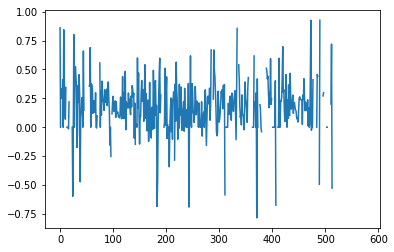

In [19]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data['hours'],data['sentiment'])
plt.show()

In [12]:
files = ['tweets_#gohawks.txt']
rawdata = {'hours':list(),'title':list(),'tweets':list(),'retweet':list(),'followers':list(),'maxfollowers':list(),
           'timeofday':list(),'usermention':list(),'rankingscore':list(),'sta':list(),'hashtags':list(),
           'verified':list(),'sentiment':list()}
for filename in files:
    with open(filename) as file:
        for line in file:
            data_line = json.loads(line)
            cite_date = data_line['citation_date']
            pst_tz = timezone('US/Pacific')
            x = datetime.fromtimestamp(cite_date, pst_tz)
            rawdata['hours'].append(x)
            rawdata['title'].append(data_line['title'])
            rawdata['tweets'].append(1)
            rawdata['retweet'].append(data_line['metrics']['citations']['total'])  
            rawdata['followers'].append(data_line['author']['followers'])
            rawdata['maxfollowers'].append(data_line['author']['followers'])
            rawdata['timeofday'].append(x.hour)
            rawdata['usermention'].append(len(data_line['tweet']['entities']['user_mentions']))
            rawdata['hashtags'].append(len(data_line['tweet']['entities']['hashtags']))
            rawdata['rankingscore'].append(data_line['metrics']['ranking_score'])
            rawdata['sta'].append(data_line['tweet']['user']['statuses_count'])
            rawdata['verified'].append(data_line['tweet']['user']['verified'])
    print(len(rawdata['hours']))

sid = SentimentIntensityAnalyzer()
for title in rawdata['title']:
    ss = sid.polarity_scores(title)
    rawdata['sentiment'].append(ss['compound'])
print(len(rawdata['sentiment']))

rawdata = pd.DataFrame(rawdata, columns=['hours','title','tweets','retweet','followers','maxfollowers',
                        'timeofday','usermention','rankingscore','sta','hashtags','verified','sentiment'])
data_gp = rawdata.groupby(pd.Grouper(key='hours', freq='3600s'))

data = {'hours':list(),'tweets':list(),'retweet':list(),'followers':list(),'timeofday':list(),
        'usermention':list(),'rankingscore':list(),'hashtags':list(),'verified':list(),'sentiment':list()}
for i,(j,group) in enumerate(data_gp):
    data['hours'].append(i)
    data['tweets'].append(group.tweets.sum())
    data['retweet'].append(group.retweet.sum())
    data['followers'].append(group.followers.sum())
    data['timeofday'].append(group.timeofday.max())
    data['usermention'].append(group.usermention.sum())
    data['rankingscore'].append(group.rankingscore.mean())
    data['hashtags'].append(group.hashtags.sum())
    data['verified'].append(group.verified.sum())
    data['sentiment'].append(group.sentiment.mean())
data = pd.DataFrame(data, columns = ['hours','tweets','retweet','followers','timeofday','usermention',
                                     'rankingscore','hashtags','verified','sentiment'])
print(data)

188136
188136
     hours  tweets  retweet  followers  timeofday  usermention  rankingscore  \
0        0      30      460    24989.0        0.0           25      3.980149   
1        1      13       32     7774.0        1.0           10      3.944109   
2        2      15      388    27591.0        2.0            8      4.482620   
3        3      12       53    24275.0        3.0           11      4.238441   
4        4      25       63    32679.0        4.0           30      4.217092   
5        5      32       56   139980.0        5.0           23      4.667368   
6        6      46      144   230561.0        6.0           61      4.679016   
7        7      75      209   445498.0        7.0           47      4.505802   
8        8     138     1821  1880826.0        8.0          133      4.437610   
9        9     157      807   291762.0        9.0          128      4.428978   
10      10     140      408   245601.0       10.0          103      4.439048   
11      11     126     108

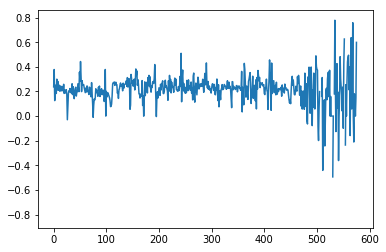

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data['hours'],data['sentiment'])
plt.show()